In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
link = 'https://drive.google.com/file/d/1GhOR1sDz86U1vVCo1XfVoVyvgGqubazQ/view'

import pandas as pd

# to get the id part of the file
id = link.split("/")[-2]

downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('city_day.csv')

df = pd.read_csv('city_day.csv')
print(df)

                City        Date  PM2.5   PM10     NO    NO2    NOx    NH3  \
0          Ahmedabad  2015-01-01    NaN    NaN   0.92  18.22  17.15    NaN   
1          Ahmedabad  2015-01-02    NaN    NaN   0.97  15.69  16.46    NaN   
2          Ahmedabad  2015-01-03    NaN    NaN  17.40  19.30  29.70    NaN   
3          Ahmedabad  2015-01-04    NaN    NaN   1.70  18.48  17.97    NaN   
4          Ahmedabad  2015-01-05    NaN    NaN  22.10  21.42  37.76    NaN   
...              ...         ...    ...    ...    ...    ...    ...    ...   
29526  Visakhapatnam  2020-06-27  15.02  50.94   7.68  25.06  19.54  12.47   
29527  Visakhapatnam  2020-06-28  24.38  74.09   3.42  26.06  16.53  11.99   
29528  Visakhapatnam  2020-06-29  22.91  65.73   3.45  29.53  18.33  10.71   
29529  Visakhapatnam  2020-06-30  16.64  49.97   4.05  29.26  18.80  10.03   
29530  Visakhapatnam  2020-07-01  15.00  66.00   0.40  26.85  14.05   5.20   

          CO    SO2      O3  Benzene  Toluene  Xylene   AQI    

In [ ]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


# Cleaning of data

In [ ]:
# Fill the mssing value wiht Mean value of numeric data.
df['PM2.5'].fillna(df['PM2.5'].mean().round(2),inplace = True )
df['PM10'].fillna(df['PM10'].mean().round(2),inplace = True )
df['NO'].fillna(df['NO'].mean().round(2),inplace = True )
df['NO2'].fillna(df['NO2'].mean().round(2),inplace = True )
df['NOx'].fillna(df['NOx'].mean().round(2),inplace = True )
df['NH3'].fillna(df['NH3'].mean().round(2),inplace = True )
df['CO'].fillna(df['CO'].mean().round(2),inplace = True )
df['SO2'].fillna(df['SO2'].mean().round(2),inplace = True )

In [ ]:
df

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,67.45,118.13,0.92,18.22,17.15,23.48,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,67.45,118.13,0.97,15.69,16.46,23.48,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,67.45,118.13,17.40,19.30,29.70,23.48,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,67.45,118.13,1.70,18.48,17.97,23.48,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,67.45,118.13,22.10,21.42,37.76,23.48,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [ ]:
df['AQI_Bucket'].unique() # getting the unique values of AOI Bucket.

array([nan, 'Poor', 'Very Poor', 'Severe', 'Moderate', 'Satisfactory',
       'Good'], dtype=object)

In [ ]:
# checking the Null values for AQI of 0 - 50  range.
good=df[(df.AQI >0)&(df.AQI <=50)]
good["AQI_Bucket"].isnull().sum()

0

In [ ]:
# checking the Null values for AQI of 51 - 100  range.
Satisfactory=df[(df.AQI >50)&(df.AQI <=100)]
Satisfactory["AQI_Bucket"].isnull().sum()

0

In [ ]:
# checking the Null values for AQI of 101 - 200  range.
Moderate=df[(df.AQI >100)&(df.AQI <=200)]
Moderate["AQI_Bucket"].isnull().sum()

0

In [ ]:
# checking the Null values for AQI of 201 - 300  range.
poor=df[(df.AQI >200)&(df.AQI <=300)]
poor["AQI_Bucket"].isnull().sum()

0

In [ ]:
# checking the Null values for AQI of 301 - 400  range.
vpoor=df[(df.AQI >300)&(df.AQI <=400)]
vpoor["AQI_Bucket"].isnull().sum()

0

In [ ]:
# checking the Null values for AQI of above 400 range.
sever=df[(df.AQI >400)]
sever["AQI_Bucket"].isnull().sum()

0

In [ ]:
# The Null value belongs to on 100 to 200 range of AQI hence they are replaced by term Mederate.
df["AQI_Bucket"].fillna("Moderate",inplace = True )

In [ ]:
# Adding a columns of Year and a Month and spliting it rom date
df["year"]=df['Date'].apply(lambda x:x.split("-")[0])
df["Month"]=df['Date'].apply(lambda x:x.split("-")[1])

In [ ]:
df.isnull().sum() # Checking the null values.


City             0
Date             0
PM2.5            0
PM10             0
NO               0
NO2              0
NOx              0
NH3              0
CO               0
SO2              0
O3               0
Benzene          0
Toluene          0
Xylene           0
AQI           4681
AQI_Bucket       0
year             0
Month            0
dtype: int64

In [ ]:
# Arranging city wise PM 2.5 levels mean values
pm2_51=df.groupby("City")["PM2.5"].mean().round()
pm2_51

City
Ahmedabad              68.0
Aizawl                 18.0
Amaravati              40.0
Amritsar               57.0
Bengaluru              38.0
Bhopal                 51.0
Brajrajnagar           65.0
Chandigarh             42.0
Chennai                51.0
Coimbatore             30.0
Delhi                 117.0
Ernakulam              26.0
Gurugram              113.0
Guwahati               64.0
Hyderabad              48.0
Jaipur                 55.0
Jorapokhar             66.0
Kochi                  31.0
Kolkata                65.0
Lucknow               108.0
Mumbai                 55.0
Patna                 114.0
Shillong               38.0
Talcher                63.0
Thiruvananthapuram     30.0
Visakhapatnam          50.0
Name: PM2.5, dtype: float64

In [ ]:
# Selecting the top 10 cities having high average PM 2.5 level.
pm2_51.sort_values(ascending=False).head(10)

City
Delhi           117.0
Patna           114.0
Gurugram        113.0
Lucknow         108.0
Ahmedabad        68.0
Jorapokhar       66.0
Kolkata          65.0
Brajrajnagar     65.0
Guwahati         64.0
Talcher          63.0
Name: PM2.5, dtype: float64

<Axes: title={'center': 'PM 2.5 Levels in different cities'}, xlabel='Level', ylabel='City'>

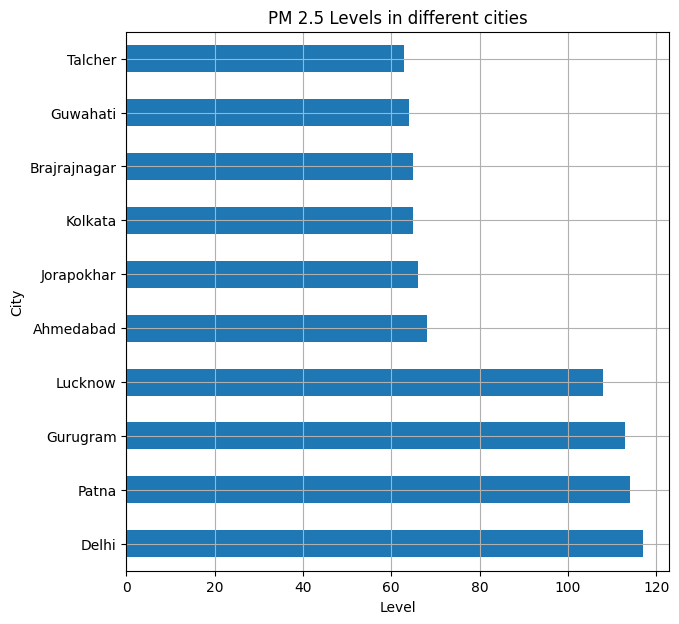

In [ ]:
# Plotting the horizontal bar plot for cities against PM 2.5 level value.
pm2_51.sort_values(ascending=False).head(10) .plot(figsize=(7,7),kind="barh",title="PM 2.5 Levels in different cities", xlabel="Level", ylabel="City",grid=True)

In [ ]:
#  Maximum and minimum NO (Nitrogen Monoxide) of each city
g = df.groupby(['City']).NO.agg([min, max])
g

,min,max
City,,
Ahmedabad,0.06,175.81
Aizawl,2.90,20.36
Amaravati,0.25,43.76
Amritsar,0.40,103.44
Bengaluru,0.46,95.19
Bhopal,0.59,30.94
Brajrajnagar,0.02,390.68
Chandigarh,0.44,70.94
Chennai,1.76,59.44


<Axes: title={'center': 'PM 2.5 count per day in different cities'}, xlabel='Count of days', ylabel='City'>

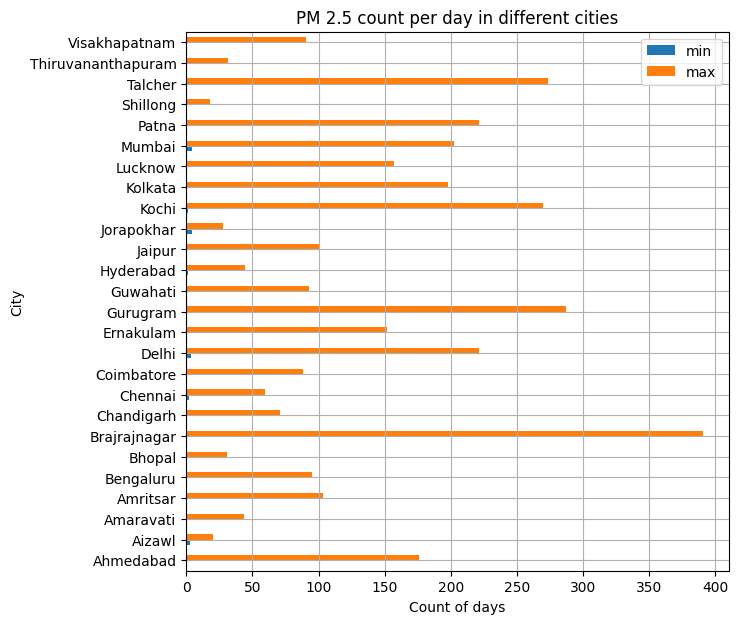

In [ ]:
# Plotting the horizontal plot of  cities with minimum and maximum level Nitrogen Monoxide,
g.plot(figsize=(7,7),kind="barh",title="PM 2.5 count per day in different cities", xlabel="Count of days", ylabel="City",grid=True)

In [ ]:
#  Maximum and minimum NO2 (Nitrogen dioxide) of each city
# NO2 is also knows an most dangerous pollutant and  is generated from the combustion of fuel engines and industry.
# It can damage the human heart and lungs and it reduces atmospheric visibility at high concentrations.
h = df.groupby(['City']).NO2.agg([min, max])
h

,min,max
City,,
Ahmedabad,0.08,292.02
Aizawl,0.05,2.85
Amaravati,1.52,140.17
Amritsar,0.79,237.27
Bengaluru,3.00,142.35
Bhopal,4.25,75.67
Brajrajnagar,0.02,41.07
Chandigarh,2.47,52.22
Chennai,3.73,112.29


In [ ]:
# Finding the top 10 cities with maximum level of NO2.
h1=h.sort_values(['max'],ascending=False)
h1.head(10)

,min,max
City,,
Gurugram,0.65,362.21
Ahmedabad,0.08,292.02
Patna,0.04,266.46
Amritsar,0.79,237.27
Delhi,10.63,162.50
Kolkata,5.08,150.01
Bengaluru,3.00,142.35
Amaravati,1.52,140.17
Visakhapatnam,0.17,130.26


<Axes: title={'center': 'PM 2.5 count per day in different cities'}, xlabel='Count of days', ylabel='City'>

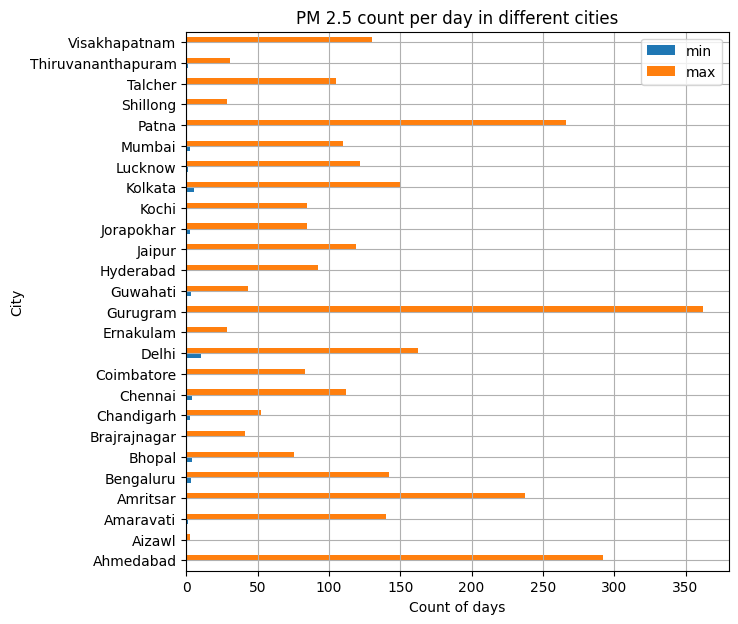

In [ ]:
# Plotting the horizontal plot of  cities with minimum and maximum level Nitrogen dioxide,

h.plot(figsize=(7,7),kind="barh",title="PM 2.5 count per day in different cities", xlabel="Count of days", ylabel="City",grid=True)

In [ ]:
# Arranging city wise PM 10 evels mean values
pm10=df.groupby("City")["PM10"].mean().sort_values(ascending=False)
pm10

City
Delhi                 228.413858
Talcher               156.553200
Gurugram              150.468940
Jorapokhar            142.241189
Jaipur                123.416230
Brajrajnagar          123.094648
Bhopal                119.287128
Patna                 119.015915
Lucknow               118.130000
Ahmedabad             117.411628
Guwahati              116.604900
Kolkata               115.798452
Amritsar              115.353645
Mumbai                110.008193
Chennai               109.817770
Visakhapatnam         107.917264
Hyderabad              96.567851
Bengaluru              89.494764
Chandigarh             85.656546
Amaravati              78.777624
Kochi                  67.335432
Shillong               59.099903
Thiruvananthapuram     55.093984
Ernakulam              50.058951
Coimbatore             39.435596
Aizawl                 24.191593
Name: PM10, dtype: float64

In [ ]:
pm10.head(10)

City
Delhi           228.413858
Talcher         156.553200
Gurugram        150.468940
Jorapokhar      142.241189
Jaipur          123.416230
Brajrajnagar    123.094648
Bhopal          119.287128
Patna           119.015915
Lucknow         118.130000
Ahmedabad       117.411628
Name: PM10, dtype: float64

<Axes: title={'center': 'PM 10 Levels in different cities'}, xlabel='City', ylabel='City'>

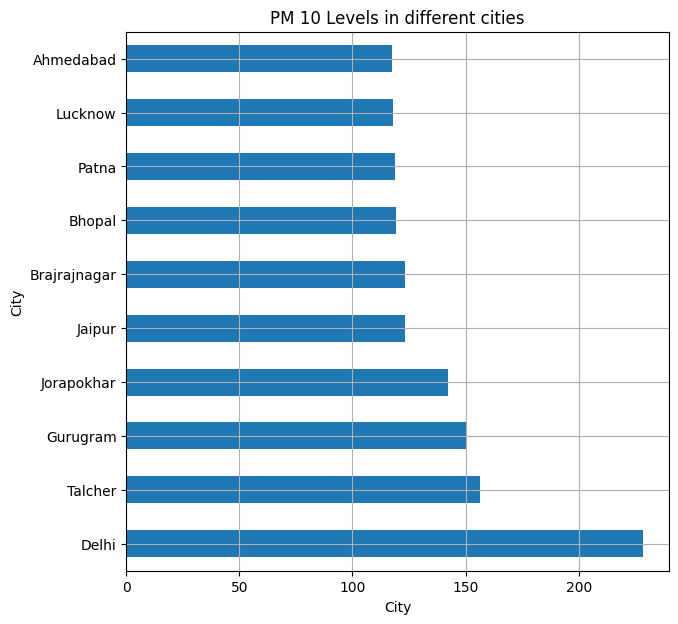

In [ ]:
pm10.head(10).plot(figsize=(7,7),kind="barh",title="PM 10 Levels in different cities", xlabel="City", ylabel="City",grid=True)

<ipython-input-141-eb6921ad36f9>:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



City
Ahmedabad             452.0
Delhi                 259.0
Patna                 241.0
Gurugram              225.0
Lucknow               218.0
Talcher               173.0
Jorapokhar            159.0
Brajrajnagar          150.0
Kolkata               141.0
Guwahati              140.0
Jaipur                134.0
Bhopal                133.0
Amritsar              120.0
Visakhapatnam         117.0
Chennai               115.0
Hyderabad             109.0
Mumbai                105.0
Kochi                 104.0
Chandigarh             96.0
Amaravati              95.0
Bengaluru              94.0
Ernakulam              92.0
Thiruvananthapuram     76.0
Coimbatore             73.0
Shillong               54.0
Aizawl                 35.0
Name: AQI, dtype: float64


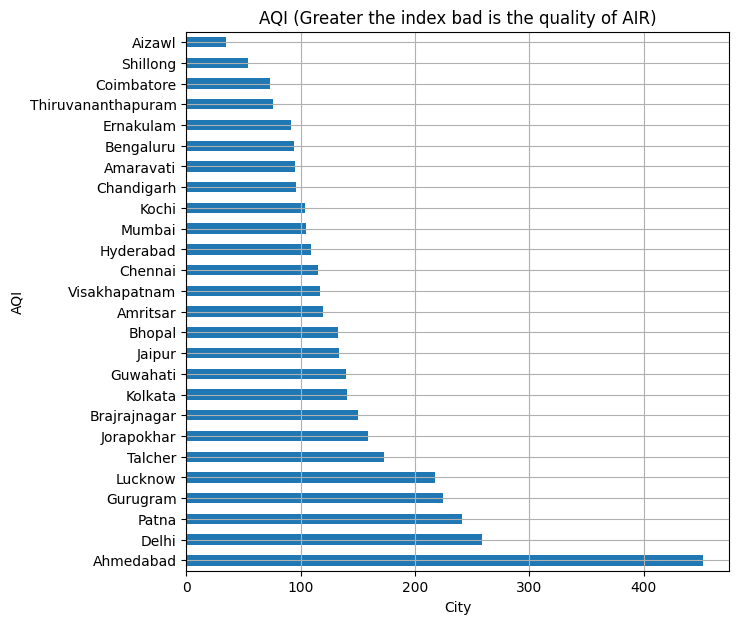

In [ ]:
# obtaining the data of city wise mean AQI index and arranging it in descending order.
aqi=df.groupby("City").mean()["AQI"].round().sort_values(ascending=False)
# Plotting the horizontal plot of  top 10 cities against high AQI value,

aqi.plot(figsize=(7,7),kind="barh",title="AQI (Greater the index bad is the quality of AIR)", xlabel="City", ylabel="AQI",grid=True)
print(aqi)

In [ ]:
# Extracting the values of AQI mean values in order of Months.
aqim=df.groupby(['Month'])["AQI"].mean().round()
aqim

Month
01    232.0
02    203.0
03    165.0
04    143.0
05    135.0
06    120.0
07    112.0
08    114.0
09    115.0
10    189.0
11    242.0
12    227.0
Name: AQI, dtype: float64

<Axes: title={'center': 'AQI index month wise'}, xlabel='Month', ylabel='AQI'>

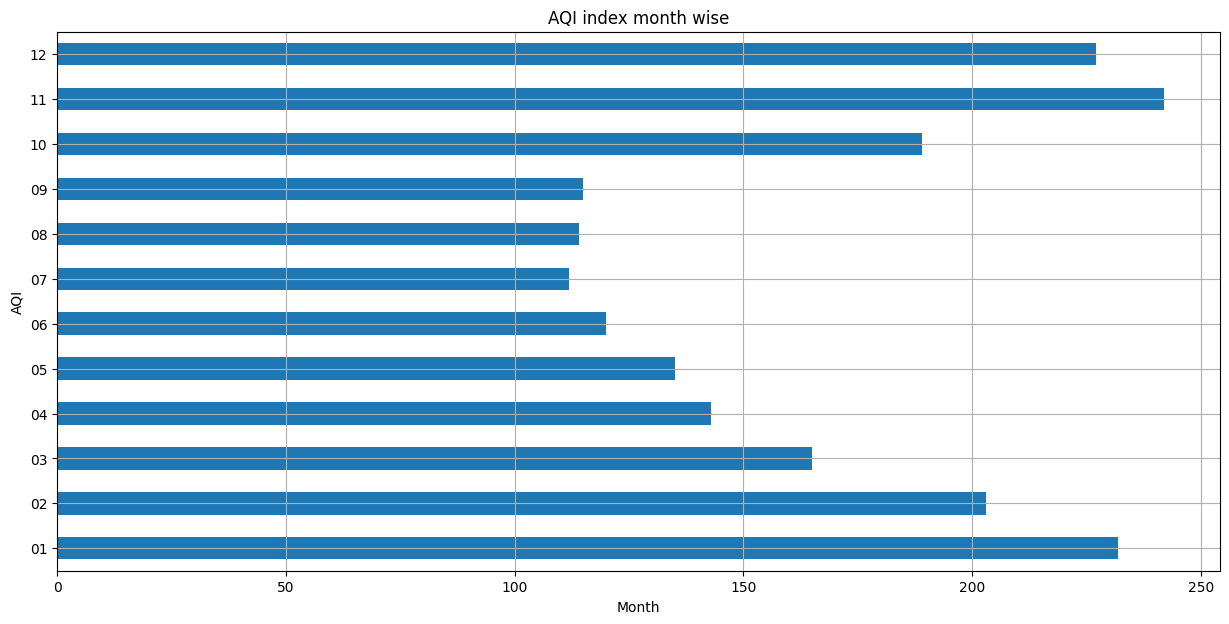

In [ ]:
# Plotting the horizontal plot of Months against AQI values.

aqim.plot(figsize=(15,7),kind="barh",title="AQI index month wise", xlabel="Month", ylabel="AQI",grid=True)

In [ ]:
# Getting the data of Cities with AQI mean values.
AQIB=df.groupby("City")["AQI"].mean()

In [ ]:
# Resetting the index values of dataset.
AQIB=AQIB.reset_index()

In [ ]:
AQIB

,City,AQI
0,Ahmedabad,452.122939
1,Aizawl,34.765766
2,Amaravati,95.299643
3,Amritsar,119.920959
4,Bengaluru,94.318325
5,Bhopal,132.827338
6,Brajrajnagar,150.280505
7,Chandigarh,96.498328
8,Chennai,114.502654
9,Coimbatore,73.023256


# AQI Category (Range)
*   Good (0-50)
*   Satisfactory (51-100)
*   Moderate (101-200)
*   Poor (201-300)
*   Very poor (301-400)
*   Severe (401-500)












In [ ]:
# Programming a function which will compare the values of AQI and gives its respective remark in next columns.
def categorise(row):
    if row['AQI'] > 0 and row['AQI'] <= 50:
        return 'Good'
    elif row['AQI'] > 50 and row['AQI'] <= 100:
        return 'Satisfactory'
    elif row['AQI'] > 100 and row['AQI'] <= 200:
        return 'Moderate'
    elif row['AQI'] > 200 and row['AQI'] <= 300:
        return 'Poor'
    elif row['AQI'] > 300 and row['AQI'] <= 400:
        return 'Very Poor'
    return 'Sever'

In [ ]:
# Applying the values on AQIB Bucket.
AQIB['AQI_Bucket'] = AQIB.apply(lambda row: categorise(row), axis=1)

In [ ]:
# Changing the index to City.
AQIB.set_index(AQIB["City"],inplace=True)

In [ ]:
# Dropping the extra City Column.
AQIB.drop("City",axis=1)

,AQI,AQI_Bucket
City,,
Ahmedabad,452.122939,Sever
Aizawl,34.765766,Good
Amaravati,95.299643,Satisfactory
Amritsar,119.920959,Moderate
Bengaluru,94.318325,Satisfactory
Bhopal,132.827338,Moderate
Brajrajnagar,150.280505,Moderate
Chandigarh,96.498328,Satisfactory
Chennai,114.502654,Moderate


In [ ]:
# Getting the value counts of AQI Bucket.
AQIB1=AQIB["AQI_Bucket"].value_counts()

<Axes: title={'center': 'AQI (Greater the index bad is the quality of AIR)'}, xlabel='City', ylabel='AQI'>

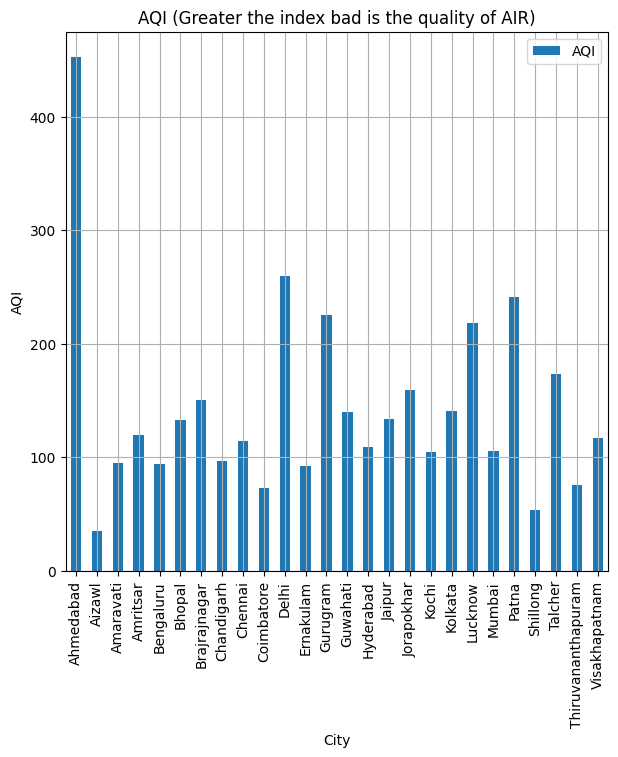

In [ ]:
# Plotting the horizontal plot of  cities with High level values of AQI,

AQIB.plot(x="City",y=["AQI","AQI_Bucket"],figsize=(7,7),kind="bar",title="AQI (Greater the index bad is the quality of AIR)", xlabel="City", ylabel="AQI",grid=True)

Moderate        13
Satisfactory     7
Poor             4
Sever            1
Good             1
Name: AQI_Bucket, dtype: int64


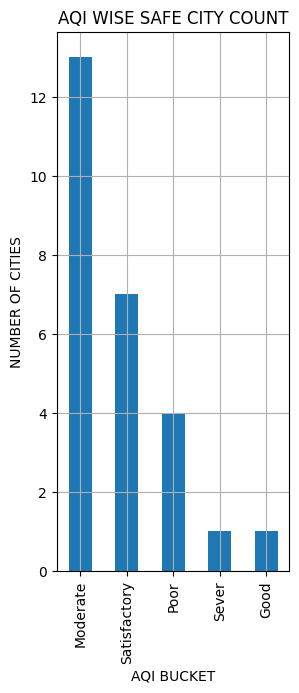

In [ ]:
# Plotting the bar plot of  AQI Bucket with repeating count from data.,
AQIB1.plot(figsize=(3,7),kind="bar",title="AQI WISE SAFE CITY COUNT", xlabel="AQI BUCKET", ylabel="NUMBER OF CITIES",grid=True)
print(AQIB1)

In [ ]:
#loading
import pandas as pd
import numpy as np
import missingno as msno
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
!pip install chart_studio
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')
#preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from collections import Counter
# Classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.rename(columns = {'AQI_Bucket':'Air_quality'}, inplace = True)
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,Air_quality,year,Month
0,Ahmedabad,2015-01-01,67.45,118.13,0.92,18.22,17.15,23.48,0.92,27.64,133.36,0.00,0.02,0.00,NaN,Moderate,2015,01
1,Ahmedabad,2015-01-02,67.45,118.13,0.97,15.69,16.46,23.48,0.97,24.55,34.06,3.68,5.50,3.77,NaN,Moderate,2015,01
2,Ahmedabad,2015-01-03,67.45,118.13,17.40,19.30,29.70,23.48,17.40,29.07,30.70,6.80,16.40,2.25,NaN,Moderate,2015,01
3,Ahmedabad,2015-01-04,67.45,118.13,1.70,18.48,17.97,23.48,1.70,18.59,36.08,4.43,10.14,1.00,NaN,Moderate,2015,01
4,Ahmedabad,2015-01-05,67.45,118.13,22.10,21.42,37.76,23.48,22.10,39.33,39.31,7.01,18.89,2.78,NaN,Moderate,2015,01


# Exploratory Data Analysis
Missing value analysis and Treatment

In [ ]:
df1 = df.copy()
df1['PM2.5']=df1['PM2.5'].fillna((df1['PM2.5'].median()))
df1['PM10']=df1['PM10'].fillna((df1['PM10'].median()))
df1['NO']=df1['NO'].fillna((df1['NO'].median()))
df1['NO2']=df1['NO2'].fillna((df1['NO2'].median()))
df1['NOx']=df1['NOx'].fillna((df1['NOx'].median()))
df1['NH3']=df1['NH3'].fillna((df1['NH3'].median()))
df1['CO']=df1['CO'].fillna((df1['CO'].median()))
df1['SO2']=df1['SO2'].fillna((df1['SO2'].median()))
df1['O3']=df1['O3'].fillna((df1['O3'].median()))
df1['Benzene']=df1['Benzene'].fillna((df1['Benzene'].median()))
df1['Toluene']=df1['Toluene'].fillna((df1['Toluene'].median()))
df1['Xylene']=df1['Xylene'].fillna((df1['Xylene'].median()))
df1['AQI']=df1['AQI'].fillna((df1['AQI'].median()))
df1['Air_quality']=df1['Air_quality'].fillna('Moderate')

NameError: ignored

Here I divide the data set into two part namely Vehicular Pollution content (PM2.5, PM10, NO2, NH3, CO,) and Industrial Pollution content (CO, SO2, O3, Benzene, Toluene, Xylene) and find how these contents correlated with AQI (air quality index)

In [ ]:
df = df1.copy()
df = df[df['Date'] <= ('01-01-2020')]
df['Vehicular Pollution content'] = df['PM2.5']+df['PM10']+df['NO']+df['NO2']+df['NOx']+df['NH3']+df['CO']
df['Industrial Pollution content'] = df['SO2']+df['O3']+df['Benzene']+df['Toluene']+df['Xylene']
df = df.drop(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3','Benzene','Toluene','Xylene'],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24908 entries, 0 to 29348
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   City                          24908 non-null  object        
 1   Date                          24908 non-null  datetime64[ns]
 2   AQI                           24908 non-null  float64       
 3   Air_quality                   24908 non-null  object        
 4   year                          24908 non-null  object        
 5   Month                         24908 non-null  object        
 6   Vehicular Pollution content   24908 non-null  float64       
 7   Industrial Pollution content  24908 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 1.7+ MB


# Preprocessing

In [ ]:
categorical_attributes = list(df1.select_dtypes(include=['object']).columns)
print("categorical_attributes",categorical_attributes)
le=LabelEncoder()
df1['City']=le.fit_transform(df1['City'].astype(str))
df1['Air_quality']=le.fit_transform(df1['Air_quality'].astype(str))
df1.info()

categorical_attributes ['City', 'Air_quality', 'year', 'Month']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   City         29531 non-null  int64         
 1   Date         29531 non-null  datetime64[ns]
 2   PM2.5        29531 non-null  float64       
 3   PM10         29531 non-null  float64       
 4   NO           29531 non-null  float64       
 5   NO2          29531 non-null  float64       
 6   NOx          29531 non-null  float64       
 7   NH3          29531 non-null  float64       
 8   CO           29531 non-null  float64       
 9   SO2          29531 non-null  float64       
 10  O3           29531 non-null  float64       
 11  Benzene      29531 non-null  float64       
 12  Toluene      29531 non-null  float64       
 13  Xylene       29531 non-null  float64       
 14  AQI          29531 non-null  float64  

In [ ]:
cor = df1.corr()
cor.style.background_gradient(cmap='coolwarm')

<ipython-input-159-b0771c35bfbc>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,Air_quality
City,1.000000,0.072811,-0.013009,0.056491,-0.069854,0.025792,-0.178003,-0.261160,-0.094846,0.004186,0.006757,-0.043474,-0.048083,-0.121778,-0.053770
PM2.5,0.072811,1.000000,0.558084,0.426376,0.344341,0.380725,0.189211,0.086663,0.119512,0.155330,0.021936,0.107791,0.070460,0.623163,0.376321
PM10,-0.013009,0.558084,1.000000,0.431006,0.359166,0.415132,0.223027,0.047521,0.176189,0.203596,0.019216,0.121983,0.031256,0.481032,0.208993
NO,0.056491,0.426376,0.431006,1.000000,0.462401,0.746222,0.156391,0.211643,0.166190,0.014218,0.033906,0.134208,0.059503,0.427303,0.229363
NO2,-0.069854,0.344341,0.359166,0.462401,1.000000,0.574188,0.165975,0.353235,0.382758,0.285448,0.025087,0.254081,0.133041,0.523756,0.234885
NOx,0.025792,0.380725,0.415132,0.746222,0.574188,1.000000,0.128046,0.225096,0.208355,0.083063,0.037385,0.168781,0.056921,0.434099,0.198123
NH3,-0.178003,0.189211,0.223027,0.156391,0.165975,0.128046,1.000000,0.020009,-0.021022,0.078685,-0.011858,0.007442,-0.002219,0.140208,0.081169
CO,-0.261160,0.086663,0.047521,0.211643,0.353235,0.225096,0.020009,1.000000,0.472587,0.039787,0.061352,0.274883,0.145192,0.648076,0.207240
SO2,-0.094846,0.119512,0.176189,0.166190,0.382758,0.208355,-0.021022,0.472587,1.000000,0.156610,0.033060,0.265525,0.203773,0.445520,0.143484
O3,0.004186,0.155330,0.203596,0.014218,0.285448,0.083063,0.078685,0.039787,0.156610,1.000000,0.018750,0.113687,0.068019,0.193174,0.015769


In [ ]:
y = df1["Air_quality"]
x = df1[['City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI']]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [ ]:
print('Classes and number of values in trainset',Counter(y_train))

Classes and number of values in trainset Counter({1: 9393, 3: 5799, 2: 1940, 5: 1634, 4: 957, 0: 948})


# Data Imbalance:

Here we observe that target label is not splitted eqaully. This will cause data imbalance problem. In order to overcome this problem we use the technique called SMOTE(Synthetic Minority Oversampling Technique). This approach solve this problem by oversample the examples in the minority class.

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train,y_train = oversample.fit_resample(X_train,y_train)
print('Classes and number of values in trainset after SMOTE:',Counter(y_train))

Classes and number of values in trainset after SMOTE: Counter({1: 9393, 5: 9393, 3: 9393, 0: 9393, 2: 9393, 4: 9393})


# Classification

# 1. Support Vector Machine

In [ ]:
cls=SVC()
cls.fit(X_train,y_train)
svmpred=cls.predict(X_test)
svmpred
cm=confusion_matrix(y_test,svmpred)
print("confussion matrix")
print(cm)
print("\n")
accuracy=accuracy_score(y_test,svmpred)
print("accuracy",accuracy*100)

confussion matrix
[[ 393    0    0    0    0    0]
 [   0 3947   77   93    0    0]
 [   0    0  822    0    0   19]
 [ 121    2    0 2302    0    0]
 [   0    0    0    0  379    2]
 [   0    0    2    0   12  689]]


accuracy 96.2979683972912


# 2. Random Forest

In [ ]:
rf = RandomForestClassifier(n_estimators=20, random_state=23)
rf.fit(X_train, y_train)
rf_predict=rf.predict(X_test)
rf_predict1=rf.predict(X_train)
rf_conf_matrix = confusion_matrix(y_test, rf_predict)
rf_acc_score = accuracy_score(y_test, rf_predict)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("accuracy",rf_acc_score*100)

confussion matrix
[[ 393    0    0    0    0    0]
 [   0 4115    2    0    0    0]
 [   0    2  839    0    0    0]
 [   0    2    0 2423    0    0]
 [   0    0    0    0  381    0]
 [   0    0    1    0    0  702]]


accuracy 99.92099322799098


# 3. XGBoost

In [ ]:
gbc=XGBClassifier(learning_rate =0.01,n_estimators=100,max_depth=1,
                  min_child_weight=6,subsample=0.8,seed=13)
gbc.fit(X_train,y_train)
pred = gbc.predict(X_test)
xgb_conf_matrix = confusion_matrix(y_test, pred)
accuracy = accuracy_score(y_test, pred)*100
print("confussion matrix")
print(xgb_conf_matrix)
print("\n")
print("accuracy",accuracy)

confussion matrix
[[ 393    0    0    0    0    0]
 [   0 4117    0    0    0    0]
 [   0    0  841    0    0    0]
 [   0    0    0 2425    0    0]
 [   0    0    0    0  381    0]
 [   0    0    0    0    0  703]]


accuracy 100.0


# Conclusion related to the above results.



1.   Delhi is the most polluted city in terms of vehicular pollution contents.
2.   Ahmedabad is the most polluted city in terms of industrial pollution content.
3. Extra Gradient Boost classifier 100% accurately classify the target variable.


4.  City with High level values of AQI - Ahmedabad
5.   PM 2.5 count per day (highest value) - Delhi



